In [1]:
import os
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn import utils
from pymystem3 import Mystem
from string import punctuation
from nltk.corpus import stopwords
from gensim.models import Doc2Vec
from simple_elmo import ElmoModel
from keras.preprocessing.text import Tokenizer
from gensim.models.doc2vec import TaggedDocument
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
tqdm.pandas(desc="progress-bar")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chrysalis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Read books

In [2]:
#dummy stub
first_author_name = "Blok"
second_author_name = "Lermontov"

#appending all books of an author into books_first, books_second
def read_books(author_name):
    books_text = ""
    for book_name in os.listdir(f"./books_ru/poems/{author_name}"):
        book_file = open(f"./books_ru/poems/{author_name}/{book_name}","r", encoding='utf8')
        books_text += " " + book_file.read()
        book_file.close()
    return books_text

books_first = read_books(first_author_name)
books_second = read_books(second_author_name)

author_1 = pd.DataFrame({"Author": [first_author_name], "Text": [books_first]})
author_2 = pd.DataFrame({"Author": [second_author_name], "Text": [books_second]})

author_1.head()

,Author,Text
0,Blok,Александр Блок\n\n\nВОЗМЕЗДИЕ\n\n\n ...


In [3]:
author_2.head()

,Author,Text
0,Lermontov,А. О. СМИРНОВОЙ\nВ простосердечии невежды\nКо...


Clean text from punctuation

In [4]:
russian_stopwords = stopwords.words('russian')
mystem = Mystem()
#Preprocess function

def preprocess_text(text):
    text = re.sub(r'[^ЁёА-я\s]', ' ', text)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(r' {2,}', ' ', text)

    lemmas = mystem.lemmatize(text.lower())
    tokens = [token for token in lemmas if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]

    text = " ".join(tokens)

    return text

author_1['Text'][0] = preprocess_text(author_1['Text'][0])
author_2['Text'][0] = preprocess_text(author_2['Text'][0])
authors = [author_1, author_2]

author_1.head()

,Author,Text
0,Blok,александр блок возмездие юность это возмездие ...


In [5]:
author_2.head()

,Author,Text
0,Lermontov,смирнова простосердечие невежда короче знать ж...


VISUALIZING THE DATA

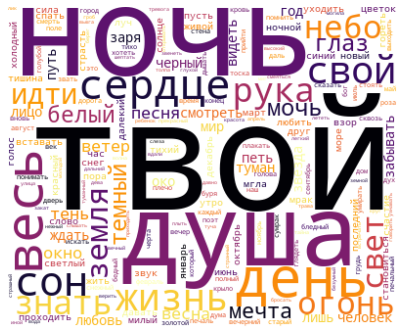

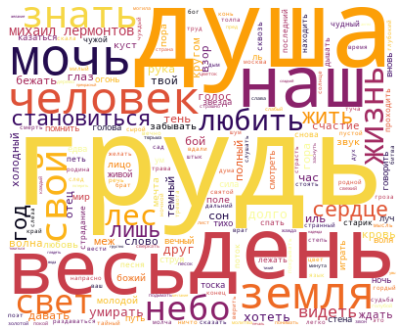

In [6]:
from wordcloud import WordCloud
#cmaps=['viridis', 'plasma', 'inferno', 'magma', 'cividis']
for book in authors:
    wordcloud = WordCloud(background_color="white",
                          stopwords=russian_stopwords,
                          mode="RGBA",
                          width=400,
                          height=330,
                          colormap='inferno').generate(book['Text'][0])
    # Display the generated image:
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Count and visualize as barplots

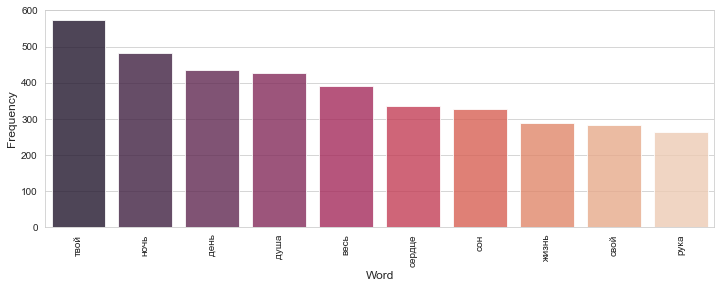

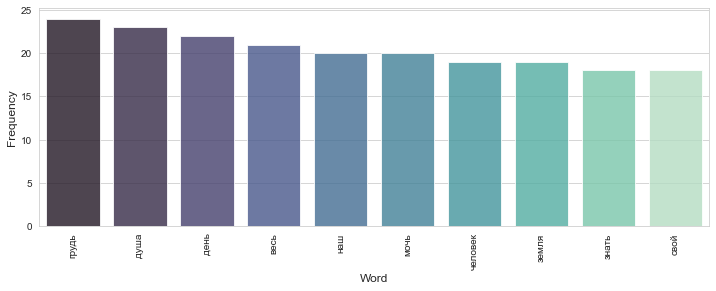

In [7]:
from collections import Counter
sns_palette = ["rocket", "mako", "magma", "rocket_r"]
sns.set_style("whitegrid")
for i, book in enumerate(authors):
    cnt_pro = np.asarray(Counter(book['Text'][0].split()).most_common(10))
    occ_df = pd.DataFrame({'word': cnt_pro[:, 0], 'count': [int(num) for num in cnt_pro[:, 1]]})
    plt.figure(figsize=(12,4))
    sns.barplot(x='word', y='count', alpha=0.8, data=occ_df, palette=sns_palette[i])
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Word', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

In [17]:
authors_chunks = []
for author in authors:
    words = author['Text'][0].split()
    chunks = [words[i-40:i] for i in range(40, len(words), 40)]
    authors_chunks.append(pd.DataFrame({'Author': author['Author'][0],'Text': chunks}))
    #authors_chunks.append(chunks)

authors_chunks[0].head()

,Author,Text
0,Blok,"[александр, блок, возмездие, юность, это, возм..."
1,Blok,"[несчастливый, ребенок, свой, век, приходиться..."
2,Blok,"[год, год, это, смерть, коммиссаржевская, смер..."
3,Blok,"[лагерь, символист, противоположный, год, явст..."
4,Blok,"[который, впервые, вырастать, сознание, неразд..."


In [9]:
authors_chunks[1].head()

,Author,Text
0,Lermontov,"[смирнова, простосердечие, невежда, короче, зн..."
1,Lermontov,"[сертук, честь, забывать, подарить, слуга, сам..."
2,Lermontov,"[решето, сей, трое, избавлять, боже, дамон, на..."
3,Lermontov,"[блаженство, безгрешный, дух, кущи, райский, с..."
4,Lermontov,"[нина, шиллер, ах, сокрыться, мрак, ненастный,..."


In [10]:
elmo = ElmoModel()
elmo.load("./212/")

2021-11-04 12:28:41,726 : INFO : Loading model from ./212/...
2021-11-04 12:28:41,728 : INFO : We will cache the vocabulary of 100 tokens.
d:\study\semester 9\gan_env\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:901: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
d:\study\semester 9\gan_env\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


'The model is now loaded.'

In [30]:
authors_embedded = []
for author in authors_chunks:
    books_embedded = elmo.get_elmo_vector_average(author['Text'].tolist())
    author['Vector'] = books_embedded.tolist()

2021-11-04 12:49:45,981 : INFO : Warming up ELMo on 32 sentences...
2021-11-04 12:49:46,665 : INFO : Warming up finished.
2021-11-04 12:49:46,670 : INFO : Texts in the current batch: 32
2021-11-04 12:49:46,786 : INFO : Texts in the current batch: 32
2021-11-04 12:49:46,905 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,019 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,132 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,251 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,366 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,478 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,591 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,705 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,822 : INFO : Texts in the current batch: 32
2021-11-04 12:49:47,931 : INFO : Texts in the current batch: 32
2021-11-04 12:49:48,043 : INFO : Texts in the current batch: 32
2021-11-04 12:49:48,155 : INFO : Texts in the 

In [33]:
authors_chunks[0].head()

,Author,Text,Vector
0,Blok,"[александр, блок, возмездие, юность, это, возм...","[0.003370385377890942, -0.0003444261946195716,..."
1,Blok,"[несчастливый, ребенок, свой, век, приходиться...","[0.0008386794903792342, -0.03553817154210664, ..."
2,Blok,"[год, год, это, смерть, коммиссаржевская, смер...","[-0.009295773292217075, -0.04034036598279354, ..."
3,Blok,"[лагерь, символист, противоположный, год, явст...","[-0.009536630747156041, 0.02017713013041013, 0..."
4,Blok,"[который, впервые, вырастать, сознание, неразд...","[-0.0015374827403308031, 0.038807801199388314,..."


In [32]:
authors_chunks[1].head()

,Author,Text,Vector
0,Lermontov,"[смирнова, простосердечие, невежда, короче, зн...","[-0.009745783378712309, -0.016592459467320138,..."
1,Lermontov,"[сертук, честь, забывать, подарить, слуга, сам...","[0.004914963384802366, 0.0112368113514168, 0.0..."
2,Lermontov,"[решето, сей, трое, избавлять, боже, дамон, на...","[-0.0005498456907866731, 0.0038493606900322783..."
3,Lermontov,"[блаженство, безгрешный, дух, кущи, райский, с...","[0.017590248107797645, 0.05114514661199482, 0...."
4,Lermontov,"[нина, шиллер, ах, сокрыться, мрак, ненастный,...","[0.016896499654814143, 0.033659739768696954, 0..."


In [ ]:
#Convert sting to numeric
sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

df.sentiment = [sentiment[item] for item in df.sentiment] 
print(df)

In [ ]:
def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

In [ ]:
print_message(0)

Text Preprocessing Below we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

In [ ]:
from bs4 import BeautifulSoup
def clean_text(text):
    text = BeautifulSoup(text, "html").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(clean_text)

In [ ]:
df['Message'] = df['Message'].apply(clean_text)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk
nltk.download('punkt')

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens

train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

# The maximum number of words to be used. (most frequent)
max_features = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

tokenizer = Tokenizer(num_words=max_features, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

In [ ]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

In [ ]:
#train_tagged.values[2173]
train_tagged.values

Model DM = 1

This work use DM=1 (it preserves word order)

In [ ]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])


In [ ]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

In [ ]:
print(d2v_model)

In [ ]:
len(d2v_model.wv.vocab)

In [ ]:
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv.vocab)+ 1, 20))

for i, vec in enumerate(d2v_model.docvecs.vectors_docs):
    while i in vec <= 1000:
    #print(i)
    #print(model.docvecs)
          embedding_matrix[i]=vec
    #print(vec)
    #print(vec[i])

# Measuring distance between two vectors (related to cosine similarity)

In [ ]:
d2v_model.wv.most_similar(positive=['profit'], topn=10)


In [ ]:
d2v_model.wv.most_similar(positive=['investment'], topn=10)


In [ ]:
d2v_model.wv.most_similar(positive=['broke'], topn=10)

Plot Similarity word in Doc2vec

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model_to_plot):
    """Creates and TSNE model and plots it"""
    plot_labels = []
    tokens = []

    for word in d2v_model.wv.vocab:
        tokens.append(model_to_plot[word])
        plot_labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for k in range(len(x)):
        plt.scatter(x[k],y[k])
        plt.annotate(plot_labels[k],
                     xy=(x[k], y[k]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
#tsne_plot(d2v_model)

# Create the LSTM Model

The parameter used here inspired by [3].

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

# init layer
model = Sequential()

# embed word vectors
model.add(Embedding(len(d2v_model.wv.vocab)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(3,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

In [ ]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs, axis=1) #  model.predict_classes(X_test, verbose=0)
print(yhat_classes)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1

In [ ]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm

In [ ]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Validation

In [ ]:
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" %score)
print("acc: %.2f" %acc)

**Save Model**

In [ ]:
model.save('Mymodel.h5')

**Test with new and different data set aside from the data to build the model.**

note : sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

In [ ]:
message = ['Congratulations! you have won a $1,000 Walmart gift card']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = ['such massive asteroid hit will certainly create new business opportunities']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = ['so does anyone else not open Snapchat anymore ? or is it just me ... ugh this so sad.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = ['@elonmusk had a terrible experience with a very pushy sales guy from tesla Stanford shop while shopping for model x']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = ['The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])